In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df= pd.read_csv(r'C:\Users\stefa\Downloads\Bitcoin/bitcoin_price.csv')


In [4]:
df.head()


,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [5]:
df.shape


(1556, 7)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [7]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df['Date'].min()


Timestamp('2013-04-28 00:00:00')

In [9]:
df['Date'].max()


Timestamp('2017-07-31 00:00:00')

In [10]:
df.isnull().sum()


Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [11]:
df.duplicated().sum()


np.int64(0)

In [12]:
df.tail()


,Date,Open,High,Low,Close,Volume,Market Cap
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [41]:
data= df.sort_index(ascending=False).reset_index()


In [14]:
data.drop('index', axis=1, inplace=True)


In [15]:
data.head()


,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


What was the change in price overtime?

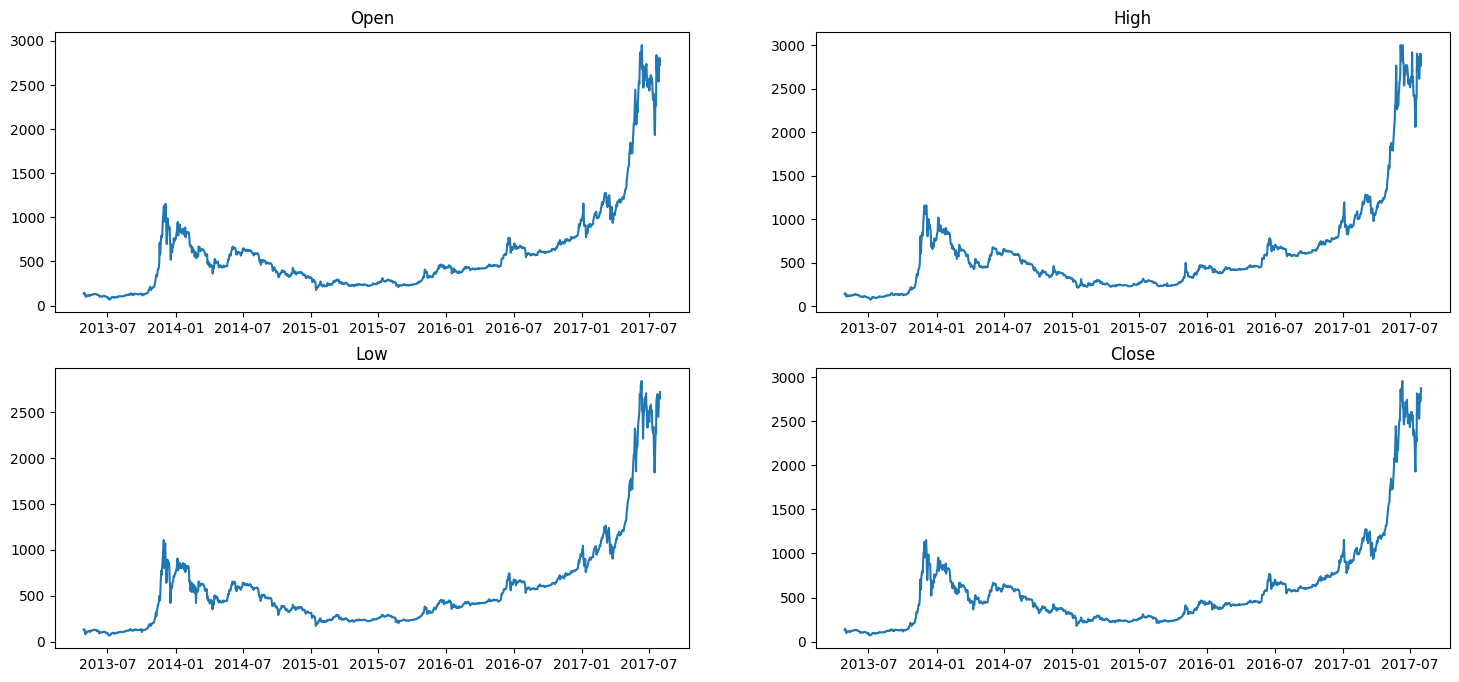

In [16]:
plt.figure(figsize=(18,8))
for index, col in enumerate(['Open', 'High', 'Low', 'Close'], 1):
    plt.subplot(2,2,index)
    plt.plot(df['Date'], df[col])
    plt.title(col)


All four lines (open, high, low, close) tell the same story: Bitcoin’s price moves a lot. There is a first big jump around the end of 2013, then the price falls and stays lower for a while. After that, starting in 2016, the price climbs again and becomes much higher by mid-2017. So overall, Bitcoin goes up in the long run, but with very big ups and downs along the way.

In [17]:
bitcoin_sample = data[0:50]


In [18]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [19]:
init_notebook_mode(connected=True)


In [20]:
trace = go.Candlestick(x=bitcoin_sample['Date'], high=bitcoin_sample['High'], open=bitcoin_sample['Open'], close=bitcoin_sample['Close'], low=bitcoin_sample['Low'])


In [21]:
candle_data = [trace]
layout = {
    'title':'Bitcoin Historical Price',
    'xaxis':{'title':'Date'}
}


In [22]:
fig= go.Figure(candle_data, layout = layout)
fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()


Here I combined the open, close, high and low prices into a single candlestick chart. This lets us see not only how Bitcoin’s price changes over time, but also how much it moves within each day – the candles and their wicks show the variation between the highest, lowest, opening and closing prices.

In [24]:
data.set_index('Date', inplace=True)


In [25]:
data.head()


,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


<Axes: xlabel='Date'>

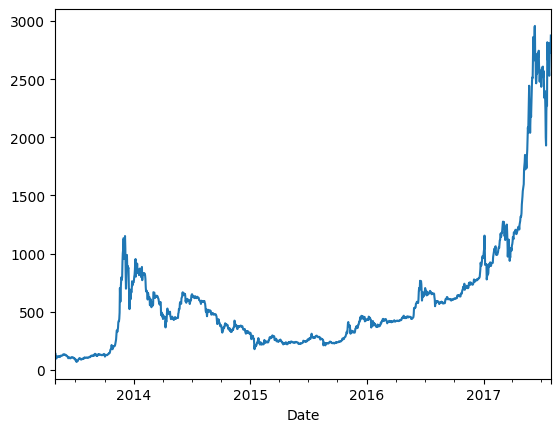

In [26]:
data['Close'].plot()


<Axes: xlabel='Date'>

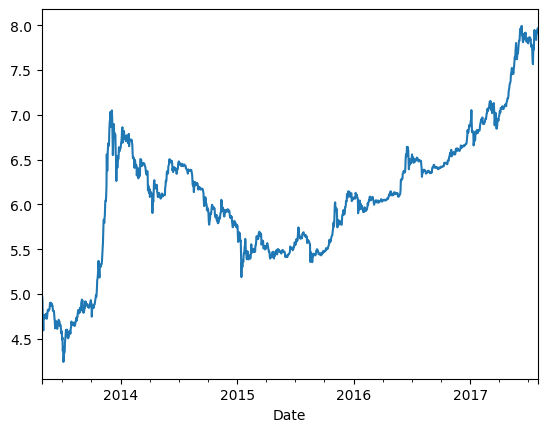

In [27]:
np.log1p(data['Close']).plot()


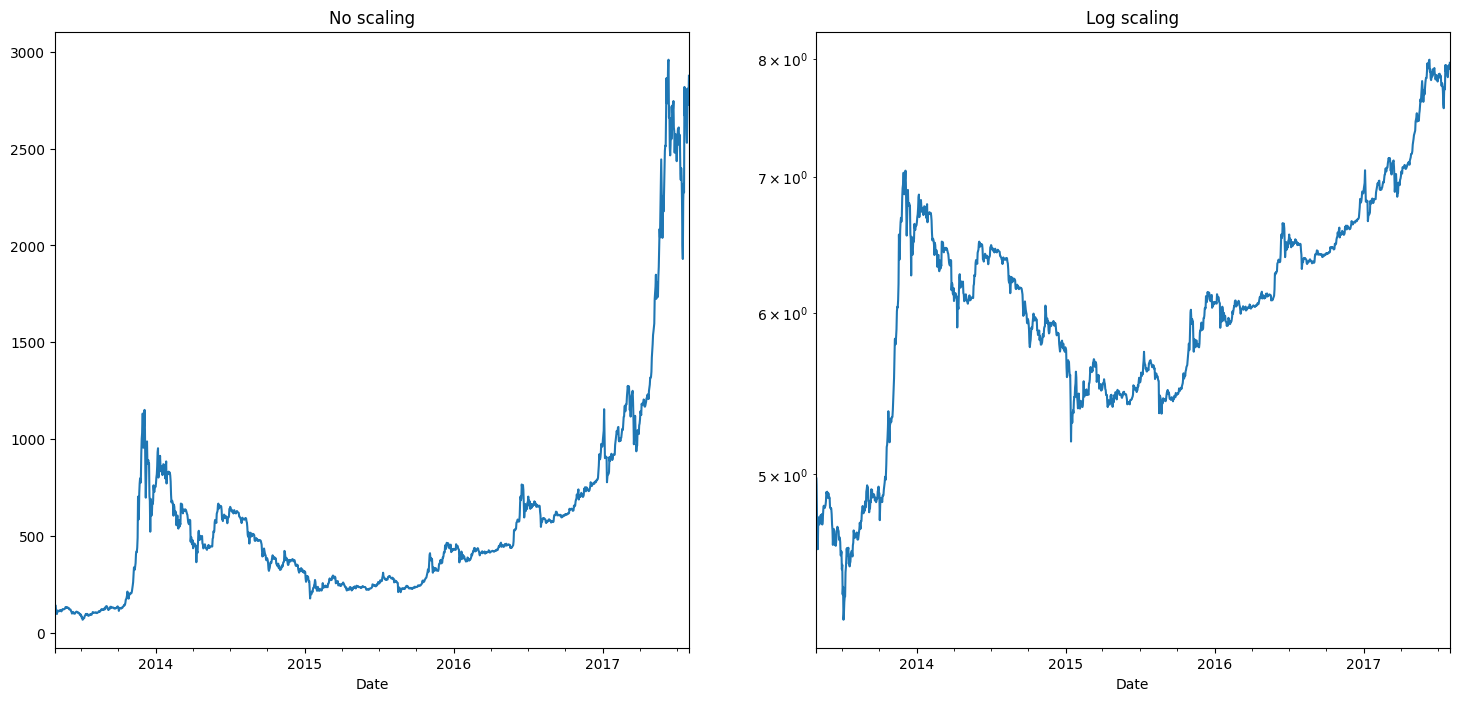

In [28]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
data['Close'].plot()
plt.title('No scaling')


plt.subplot(1,2,2)
np.log1p(data['Close']).plot()
plt.title('Log scaling')
plt.yscale('log')


Here I show the Bitcoin closing price with both a normal (linear) scale and a log scale. In both cases we see a clear upward trend starting around 2016, with the price rising faster and faster. The log chart also shows that there are no obvious repeating patterns over the years, so there is no clear seasonality in the data.

Analyze closing Price - yearly, quarterly and monthly 

<Axes: xlabel='Date'>

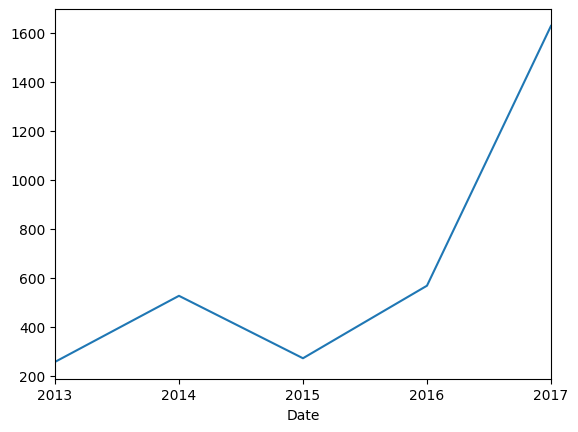

In [29]:
data['Close'].resample('YE').mean().plot()


<Axes: xlabel='Date'>

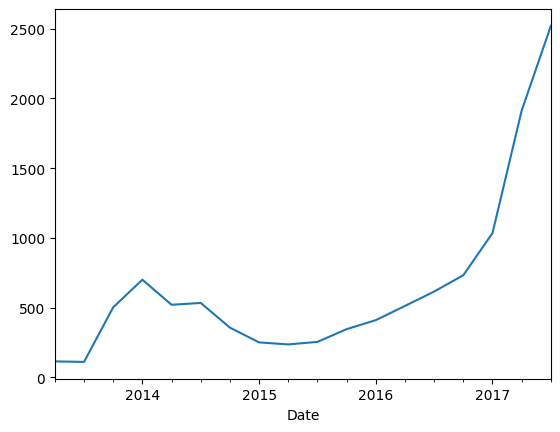

In [30]:
data['Close'].resample('QE').mean().plot()


<Axes: xlabel='Date'>

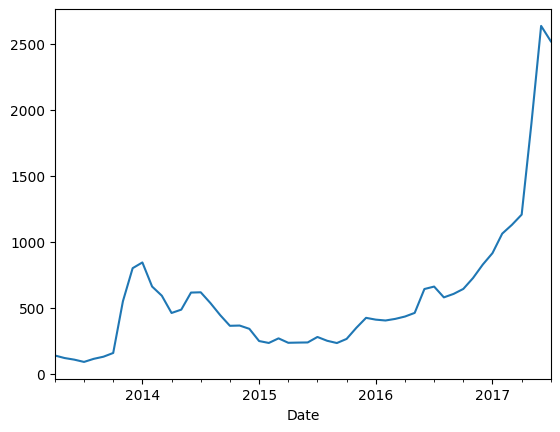

In [31]:
data['Close'].resample('ME').mean().plot()


Analyze daily change in Closing price 

In [32]:
data['close_price_pct_change']=data['Close'].pct_change()*100


In [33]:
data['close_price_pct_change']


Date
2013-04-28          NaN
2013-04-29     7.696893
2013-04-30    -3.832849
2013-05-01   -15.834532
2013-05-02   -10.069237
                ...    
2017-07-27     5.626915
2017-07-28     5.136276
2017-07-29    -2.939114
2017-07-30     1.127107
2017-07-31     4.285538
Name: close_price_pct_change, Length: 1556, dtype: float64

<Axes: xlabel='Date'>

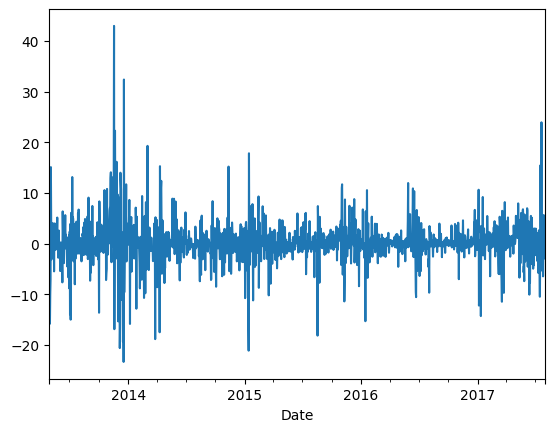

In [34]:
data['close_price_pct_change'].plot()


This plot shows the daily change in Bitcoin’s closing price. Most days the change is close to zero, but there are frequent jumps both up and down, with a few very large spikes (especially around 2013–2014 and again near the end of the period). This confirms that Bitcoin is highly volatile, with big moves in both directions and no clear repeating pattern over time